In [ ]:
# 📦 Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [ ]:
# 📁 Load Data
train_df = pd.read_parquet("train.parquet")
test_df = pd.read_parquet("test.parquet")
sample_submission = pd.read_parquet("sample_submission.parquet")

In [ ]:
!pip install pyarrow xgboost scikit-learn seaborn


In [ ]:
# 🔍 Exploratory Data Analysis
print("Train Shape:", train_df.shape)
print("Missing Values:\n", train_df.isnull().sum())
print("Target Distribution:\n", train_df['target'].value_counts(normalize=True))

Train Shape: (1639424, 7)
Missing Values:
 Date      0
X1        0
X2        0
X3        0
X4        0
X5        0
target    0
dtype: int64
Target Distribution:
 target
0    0.991437
1    0.008563
Name: proportion, dtype: float64


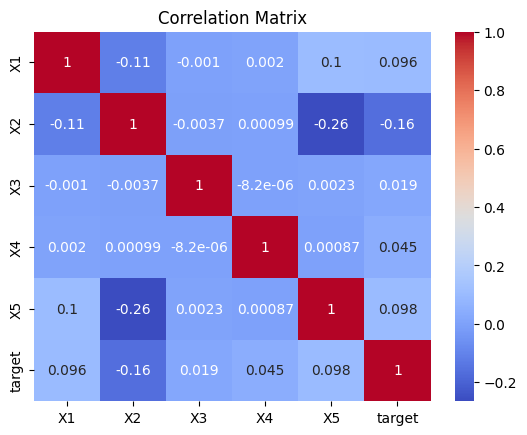

In [ ]:
# 📉 Correlation Heatmap
sns.heatmap(train_df.drop(columns=['Date']).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# 🎯 Features and Target
features = ['X1', 'X2', 'X3', 'X4', 'X5']
X = train_df[features]
y = train_df['target']

In [ ]:
# 🔍 Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(test_df[features])

In [ ]:
# 🧪 Split for Validation
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
# 🌳 Model 1: Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_val)

# Convert predictions and true values to strings
y_pred_rf = y_pred_rf.astype(str)
y_val = y_val.astype(str)

print("🔍 Random Forest Results:")
print(confusion_matrix(y_val, y_pred_rf))
print(classification_report(y_val, y_pred_rf))
print("F1 Score:", f1_score(y_val, y_pred_rf))
print("Accuracy:", accuracy_score(y_val, y_pred_rf))

🔍 Random Forest Results:
[[324390    687]
 [  2075    733]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    325077
           1       0.52      0.26      0.35      2808

    accuracy                           0.99    327885
   macro avg       0.75      0.63      0.67    327885
weighted avg       0.99      0.99      0.99    327885



ValueError: pos_label=1 is not a valid label. It should be one of ['0', '1']